In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import plot_tree
import graphviz

In [ ]:
df = pd.read_csv('final_dataset.csv', encoding='latin-1')

df.head()

Player                 Club  Age Position   Nation      Value  \
0   Kylian Mbappe  Paris Saint-Germain   22   attack   France  144000000   
1  Erling Haaland    Borussia Dortmund   21   attack   Norway  117000000   
2      Harry Kane    Tottenham Hotspur   28   attack  England  108000000   
3    Jadon Sancho    Manchester United   21   attack  England   90000000   
4   Mohamed Salah         Liverpool FC   29   attack    Egypt   90000000   

  Contract Years Left          League Squad (20/21)  MP (20/21)  ...  \
0                   1         Ligue 1     Paris S-G        31.0  ...   
1                   3      Bundesliga      Dortmund        28.0  ...   
2                   3  Premier League     Tottenham        35.0  ...   
3                   5  Premier League      Dortmund        26.0  ...   
4                   2  Premier League     Liverpool        37.0  ...   

   Offsides (17/18)  Crosses (17/18)  Interceptions (17/18)  \
0              23.0             62.0                    1.0   
1               NaN              NaN                    NaN   
2              43.0             24.0                    7.0   
3               1.0             15.0                    6.0   
4              18.0             50.0                   13.0   

   Penalty Kicks Won (17/18)  Penalties Conceded (17/18)  Own Goals (17/18)  \
0                        1.0                         0.0                0.0   
1                        NaN                         NaN                NaN   
2                        1.0                         0.0                0.0   
3                        0.0                         0.0                0.0   
4                        1.0                         0.0                0.0   

   Total Loose Balls Recovered (17/18)  Aerial Duel Won (17/18)  \
0                                 98.0                      1.0   
1                                  NaN                      NaN   
2                                124.0                     69.0   
3                                 57.0                      3.0   
4                                219.0                     19.0   

   Aerial Duel Lost (17/18)  % Aerial Duels Won (17/18)  
0                       4.0                        20.0  
1                       NaN                         NaN  
2                     111.0                        38.3  
3                      14.0                        17.6  
4                      58.0                        24.7  

[5 rows x 548 columns]

In [ ]:
drive.mount('/content/drive')

#csv_path = '/Shared with me/Team Project/final_dataset.csv'
csv_path = '/content/drive/MyDrive/final_dataset.csv'
#csv_path = '/content/drive/MyDrive/Team Project/final_dataset.csv'


df = pd.read_csv(csv_path, encoding='latin-1')

df.head()


Mounted at /content/drive


Player                 Club  Age Position   Nation      Value  \
0   Kylian Mbappe  Paris Saint-Germain   22   attack   France  144000000   
1  Erling Haaland    Borussia Dortmund   21   attack   Norway  117000000   
2      Harry Kane    Tottenham Hotspur   28   attack  England  108000000   
3    Jadon Sancho    Manchester United   21   attack  England   90000000   
4   Mohamed Salah         Liverpool FC   29   attack    Egypt   90000000   

  Contract Years Left          League Squad (20/21)  MP (20/21)  ...  \
0                   1         Ligue 1     Paris S-G        31.0  ...   
1                   3      Bundesliga      Dortmund        28.0  ...   
2                   3  Premier League     Tottenham        35.0  ...   
3                   5  Premier League      Dortmund        26.0  ...   
4                   2  Premier League     Liverpool        37.0  ...   

   Offsides (17/18)  Crosses (17/18)  Interceptions (17/18)  \
0              23.0             62.0                    1.0   
1               NaN              NaN                    NaN   
2              43.0             24.0                    7.0   
3               1.0             15.0                    6.0   
4              18.0             50.0                   13.0   

   Penalty Kicks Won (17/18)  Penalties Conceded (17/18)  Own Goals (17/18)  \
0                        1.0                         0.0                0.0   
1                        NaN                         NaN                NaN   
2                        1.0                         0.0                0.0   
3                        0.0                         0.0                0.0   
4                        1.0                         0.0                0.0   

   Total Loose Balls Recovered (17/18)  Aerial Duel Won (17/18)  \
0                                 98.0                      1.0   
1                                  NaN                      NaN   
2                                124.0                     69.0   
3                                 57.0                      3.0   
4                                219.0                     19.0   

   Aerial Duel Lost (17/18)  % Aerial Duels Won (17/18)  
0                       4.0                        20.0  
1                       NaN                         NaN  
2                     111.0                        38.3  
3                      14.0                        17.6  
4                      58.0                        24.7  

[5 rows x 548 columns]

In [ ]:
# Remove data rows with the same Player Name

df1 = df.drop_duplicates('Player')
# limitations: removing duplicates may cause some real players' data to be missing
# since the data were the same for players with the same name

Player                      Club  Age    Position    Nation  \
0          Kylian Mbappe       Paris Saint-Germain   22      attack    France   
1         Erling Haaland         Borussia Dortmund   21      attack    Norway   
2             Harry Kane         Tottenham Hotspur   28      attack   England   
3           Jadon Sancho         Manchester United   21      attack   England   
4          Mohamed Salah              Liverpool FC   29      attack     Egypt   
...                  ...                       ...  ...         ...       ...   
2070      Matis Carvalho           Montpellier HSC   22  Goalkeeper  Portugal   
2071  Lorenzo Andrenacci                 Genoa CFC   26  Goalkeeper     Italy   
2072    Mamadou Doucoure  Borussia Mönchengladbach   23    Defender    France   
2073      Michael Langer             FC Schalke 04   36  Goalkeeper   Austria   
2074     Gianluca Pegolo               US Sassuolo   40  Goalkeeper     Italy   

          Value Contract Years Left          League Squad (20/21)  MP (20/21)  \
0     144000000                   1         Ligue 1     Paris S-G        31.0   
1     117000000                   3      Bundesliga      Dortmund        28.0   
2     108000000                   3  Premier League     Tottenham        35.0   
3      90000000                   5  Premier League      Dortmund        26.0   
4      90000000                   2  Premier League     Liverpool        37.0   
...         ...                 ...             ...           ...         ...   
2070     180000                   1         Ligue 1           NaN         NaN   
2071     135000                   3         Serie A           NaN         NaN   
2072      90000                   3      Bundesliga           NaN         NaN   
2073      90000                   1      Bundesliga    Schalke 04         3.0   
2074      90000                   1         Serie A           NaN         NaN   

      ...  Offsides (17/18)  Crosses (17/18)  Interceptions (17/18)  \
0     ...              23.0             62.0                    1.0   
1     ...               NaN              NaN                    NaN   
2     ...              43.0             24.0                    7.0   
3     ...               1.0             15.0                    6.0   
4     ...              18.0             50.0                   13.0   
...   ...               ...              ...                    ...   
2070  ...               NaN              NaN                    NaN   
2071  ...               NaN              NaN                    NaN   
2072  ...               NaN              NaN                    NaN   
2073  ...               NaN              NaN                    NaN   
2074  ...               0.0              0.0                    0.0   

      Penalty Kicks Won (17/18)  Penalties Conceded (17/18)  \
0                           1.0                         0.0   
1                           NaN                         NaN   
2                           1.0                         0.0   
3                           0.0                         0.0   
4                           1.0                         0.0   
...                         ...                         ...   
2070                        NaN                         NaN   
2071                        NaN                         NaN   
2072                        NaN                         NaN   
2073                        NaN                         NaN   
2074                        0.0                         0.0   

      Own Goals (17/18)  Total Loose Balls Recovered (17/18)  \
0                   0.0                                 98.0   
1                   NaN                                  NaN   
2                   0.0                                124.0   
3                   0.0                                 57.0   
4                   0.0                                219.0   
...                 ...                                  ...   
2070          

In [ ]:
# Check if remove_duplicates are done correctly
df1[df1['Player']=='Luis Suarez']

Player                Club  Age Position   Nation     Value  \
526  Luis Suarez  Atlético de Madrid   34   attack  Uruguay  13500000   

    Contract Years Left   League    Squad (20/21)  MP (20/21)  ...  \
526                   1  La Liga  Atlético Madrid        32.0  ...   

     Offsides (17/18)  Crosses (17/18)  Interceptions (17/18)  \
526              56.0             40.0                    5.0   

     Penalty Kicks Won (17/18)  Penalties Conceded (17/18)  Own Goals (17/18)  \
526                        1.0                         0.0                0.0   

     Total Loose Balls Recovered (17/18)  Aerial Duel Won (17/18)  \
526                                104.0                      3.0   

     Aerial Duel Lost (17/18)  % Aerial Duels Won (17/18)  
526                       8.0                        27.3  

[1 rows x 548 columns]

In [ ]:
# Impute 0 for all missing values, which maybe due to various reasons, e.g. injury, relegation, not in top-5 league...

df1.fillna(0, inplace = True)

<ipython-input-7-3e1b183af9bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.fillna(0, inplace = True)


In [ ]:
df1

Player                      Club  Age    Position    Nation  \
0          Kylian Mbappe       Paris Saint-Germain   22      attack    France   
1         Erling Haaland         Borussia Dortmund   21      attack    Norway   
2             Harry Kane         Tottenham Hotspur   28      attack   England   
3           Jadon Sancho         Manchester United   21      attack   England   
4          Mohamed Salah              Liverpool FC   29      attack     Egypt   
...                  ...                       ...  ...         ...       ...   
2070      Matis Carvalho           Montpellier HSC   22  Goalkeeper  Portugal   
2071  Lorenzo Andrenacci                 Genoa CFC   26  Goalkeeper     Italy   
2072    Mamadou Doucoure  Borussia Mönchengladbach   23    Defender    France   
2073      Michael Langer             FC Schalke 04   36  Goalkeeper   Austria   
2074     Gianluca Pegolo               US Sassuolo   40  Goalkeeper     Italy   

          Value Contract Years Left          League Squad (20/21)  MP (20/21)  \
0     144000000                   1         Ligue 1     Paris S-G        31.0   
1     117000000                   3      Bundesliga      Dortmund        28.0   
2     108000000                   3  Premier League     Tottenham        35.0   
3      90000000                   5  Premier League      Dortmund        26.0   
4      90000000                   2  Premier League     Liverpool        37.0   
...         ...                 ...             ...           ...         ...   
2070     180000                   1         Ligue 1             0         0.0   
2071     135000                   3         Serie A             0         0.0   
2072      90000                   3      Bundesliga             0         0.0   
2073      90000                   1      Bundesliga    Schalke 04         3.0   
2074      90000                   1         Serie A             0         0.0   

      ...  Offsides (17/18)  Crosses (17/18)  Interceptions (17/18)  \
0     ...              23.0             62.0                    1.0   
1     ...               0.0              0.0                    0.0   
2     ...              43.0             24.0                    7.0   
3     ...               1.0             15.0                    6.0   
4     ...              18.0             50.0                   13.0   
...   ...               ...              ...                    ...   
2070  ...               0.0              0.0                    0.0   
2071  ...               0.0              0.0                    0.0   
2072  ...               0.0              0.0                    0.0   
2073  ...               0.0              0.0                    0.0   
2074  ...               0.0              0.0                    0.0   

      Penalty Kicks Won (17/18)  Penalties Conceded (17/18)  \
0                           1.0                         0.0   
1                           0.0                         0.0   
2                           1.0                         0.0   
3                           0.0                         0.0   
4                           1.0                         0.0   
...                         ...                         ...   
2070                        0.0                         0.0   
2071                        0.0                         0.0   
2072                        0.0                         0.0   
2073                        0.0                         0.0   
2074                        0.0                         0.0   

      Own Goals (17/18)  Total Loose Balls Recovered (17/18)  \
0                   0.0                                 98.0   
1                   0.0                                  0.0   
2                   0.0                                124.0   
3                   0.0                                 57.0   
4                   0.0                                219.0   
...                 ...                                  ...   
2070          

In [ ]:
# Count number of Null values in the data
df1.isna().sum().sum()

0

In [ ]:
# Rename column "Contract Years Left" to "Years in Europe"

df2 = df1.rename(columns = {"Contract Years Left":"Years in Europe"})
df2

Player                      Club  Age    Position    Nation  \
0          Kylian Mbappe       Paris Saint-Germain   22      attack    France   
1         Erling Haaland         Borussia Dortmund   21      attack    Norway   
2             Harry Kane         Tottenham Hotspur   28      attack   England   
3           Jadon Sancho         Manchester United   21      attack   England   
4          Mohamed Salah              Liverpool FC   29      attack     Egypt   
...                  ...                       ...  ...         ...       ...   
2070      Matis Carvalho           Montpellier HSC   22  Goalkeeper  Portugal   
2071  Lorenzo Andrenacci                 Genoa CFC   26  Goalkeeper     Italy   
2072    Mamadou Doucoure  Borussia Mönchengladbach   23    Defender    France   
2073      Michael Langer             FC Schalke 04   36  Goalkeeper   Austria   
2074     Gianluca Pegolo               US Sassuolo   40  Goalkeeper     Italy   

          Value Years in Europe          League Squad (20/21)  MP (20/21)  \
0     144000000               1         Ligue 1     Paris S-G        31.0   
1     117000000               3      Bundesliga      Dortmund        28.0   
2     108000000               3  Premier League     Tottenham        35.0   
3      90000000               5  Premier League      Dortmund        26.0   
4      90000000               2  Premier League     Liverpool        37.0   
...         ...             ...             ...           ...         ...   
2070     180000               1         Ligue 1             0         0.0   
2071     135000               3         Serie A             0         0.0   
2072      90000               3      Bundesliga             0         0.0   
2073      90000               1      Bundesliga    Schalke 04         3.0   
2074      90000               1         Serie A             0         0.0   

      ...  Offsides (17/18)  Crosses (17/18)  Interceptions (17/18)  \
0     ...              23.0             62.0                    1.0   
1     ...               0.0              0.0                    0.0   
2     ...              43.0             24.0                    7.0   
3     ...               1.0             15.0                    6.0   
4     ...              18.0             50.0                   13.0   
...   ...               ...              ...                    ...   
2070  ...               0.0              0.0                    0.0   
2071  ...               0.0              0.0                    0.0   
2072  ...               0.0              0.0                    0.0   
2073  ...               0.0              0.0                    0.0   
2074  ...               0.0              0.0                    0.0   

      Penalty Kicks Won (17/18)  Penalties Conceded (17/18)  \
0                           1.0                         0.0   
1                           0.0                         0.0   
2                           1.0                         0.0   
3                           0.0                         0.0   
4                           1.0                         0.0   
...                         ...                         ...   
2070                        0.0                         0.0   
2071                        0.0                         0.0   
2072                        0.0                         0.0   
2073                        0.0                         0.0   
2074                        0.0                         0.0   

      Own Goals (17/18)  Total Loose Balls Recovered (17/18)  \
0                   0.0                                 98.0   
1                   0.0                                  0.0   
2                   0.0                                124.0   
3                   0.0                                 57.0   
4                   0.0                                219.0   
...                 ...                                  ...   
2070                0.0                                  0.0  

In [ ]:
# Set values in Years in Europe to be 0

df2['Years in Europe']=0
df2

Player                      Club  Age    Position    Nation  \
0          Kylian Mbappe       Paris Saint-Germain   22      attack    France   
1         Erling Haaland         Borussia Dortmund   21      attack    Norway   
2             Harry Kane         Tottenham Hotspur   28      attack   England   
3           Jadon Sancho         Manchester United   21      attack   England   
4          Mohamed Salah              Liverpool FC   29      attack     Egypt   
...                  ...                       ...  ...         ...       ...   
2070      Matis Carvalho           Montpellier HSC   22  Goalkeeper  Portugal   
2071  Lorenzo Andrenacci                 Genoa CFC   26  Goalkeeper     Italy   
2072    Mamadou Doucoure  Borussia Mönchengladbach   23    Defender    France   
2073      Michael Langer             FC Schalke 04   36  Goalkeeper   Austria   
2074     Gianluca Pegolo               US Sassuolo   40  Goalkeeper     Italy   

          Value  Years in Europe          League Squad (20/21)  MP (20/21)  \
0     144000000                0         Ligue 1     Paris S-G        31.0   
1     117000000                0      Bundesliga      Dortmund        28.0   
2     108000000                0  Premier League     Tottenham        35.0   
3      90000000                0  Premier League      Dortmund        26.0   
4      90000000                0  Premier League     Liverpool        37.0   
...         ...              ...             ...           ...         ...   
2070     180000                0         Ligue 1             0         0.0   
2071     135000                0         Serie A             0         0.0   
2072      90000                0      Bundesliga             0         0.0   
2073      90000                0      Bundesliga    Schalke 04         3.0   
2074      90000                0         Serie A             0         0.0   

      ...  Offsides (17/18)  Crosses (17/18)  Interceptions (17/18)  \
0     ...              23.0             62.0                    1.0   
1     ...               0.0              0.0                    0.0   
2     ...              43.0             24.0                    7.0   
3     ...               1.0             15.0                    6.0   
4     ...              18.0             50.0                   13.0   
...   ...               ...              ...                    ...   
2070  ...               0.0              0.0                    0.0   
2071  ...               0.0              0.0                    0.0   
2072  ...               0.0              0.0                    0.0   
2073  ...               0.0              0.0                    0.0   
2074  ...               0.0              0.0                    0.0   

      Penalty Kicks Won (17/18)  Penalties Conceded (17/18)  \
0                           1.0                         0.0   
1                           0.0                         0.0   
2                           1.0                         0.0   
3                           0.0                         0.0   
4                           1.0                         0.0   
...                         ...                         ...   
2070                        0.0                         0.0   
2071                        0.0                         0.0   
2072                        0.0                         0.0   
2073                        0.0                         0.0   
2074                        0.0                         0.0   

      Own Goals (17/18)  Total Loose Balls Recovered (17/18)  \
0                   0.0                                 98.0   
1                   0.0                                  0.0   
2                   0.0                                124.0   
3                   0.0                                 57.0   
4                   0.0                                219.0   
...                 ...                                  ...   
2070                0.0                           

In [ ]:
#Count # of seasons the player has appeared in at least 1 match

season_columns = ['MP (20/21)', 'MP (19/20)', 'MP (18/19)', 'MP (17/18)']

# Iterate through the columns to create new columns based on conditions
for season_column in season_columns:
    new_column_name = f"Played in Europe ({season_column[-7:-4]})"
    df2[new_column_name] = df2[season_column].apply(lambda x: 1 if x >= 1 else 0)

In [ ]:
df2.iloc[:,540:]

Interceptions (17/18)  Penalty Kicks Won (17/18)  \
0                       1.0                        1.0   
1                       0.0                        0.0   
2                       7.0                        1.0   
3                       6.0                        0.0   
4                      13.0                        1.0   
...                     ...                        ...   
2070                    0.0                        0.0   
2071                    0.0                        0.0   
2072                    0.0                        0.0   
2073                    0.0                        0.0   
2074                    0.0                        0.0   

      Penalties Conceded (17/18)  Own Goals (17/18)  \
0                            0.0                0.0   
1                            0.0                0.0   
2                            0.0                0.0   
3                            0.0                0.0   
4                            0.0                0.0   
...                          ...                ...   
2070                         0.0                0.0   
2071                         0.0                0.0   
2072                         0.0                0.0   
2073                         0.0                0.0   
2074                         0.0                1.0   

      Total Loose Balls Recovered (17/18)  Aerial Duel Won (17/18)  \
0                                    98.0                      1.0   
1                                     0.0                      0.0   
2                                   124.0                     69.0   
3                                    57.0                      3.0   
4                                   219.0                     19.0   
...                                   ...                      ...   
2070                                  0.0                      0.0   
2071                                  0.0                      0.0   
2072                                  0.0                      0.0   
2073                                  0.0                      0.0   
2074                                  7.0                      0.0   

      Aerial Duel Lost (17/18)  % Aerial Duels Won (17/18)  \
0                          4.0                        20.0   
1                          0.0                         0.0   
2                        111.0                        38.3   
3                         14.0                        17.6   
4                         58.0                        24.7   
...                        ...                         ...   
2070                       0.0                         0.0   
2071                       0.0                         0.0   
2072                       0.0                         0.0   
2073                       0.0                         0.0   
2074                       0.0                         0.0   

      Played in Europe ((20)  Played in Europe ((19)  Played in Europe ((18)  \
0                          1                       1                       1   
1                          1                       1                       0   
2                          1                       1                       1   
3                          1                       1                       1   
4                          1                       1                       1   
...                      ...                     ...                     ...   
2070                       0                       1                       0   
2071                       0                       1                       0   
2072                       0                       1                       0   
2073                       1                       0                       0   
2074                       0                       1                       1   

      Played in Europe ((17)  
0                          1  
1                          0  
2       

In [ ]:
# Add up the values in "Played in Europe ****" columns and set their values ot be the one in "Years in Europe"

df2['Years in Europe'] = df2[[f"Played in Europe ({season[-7:-4]})" for season in season_columns]].sum(axis=1)

In [ ]:
df2.head()

Player                 Club  Age Position   Nation      Value  \
0   Kylian Mbappe  Paris Saint-Germain   22   attack   France  144000000   
1  Erling Haaland    Borussia Dortmund   21   attack   Norway  117000000   
2      Harry Kane    Tottenham Hotspur   28   attack  England  108000000   
3    Jadon Sancho    Manchester United   21   attack  England   90000000   
4   Mohamed Salah         Liverpool FC   29   attack    Egypt   90000000   

   Years in Europe          League Squad (20/21)  MP (20/21)  ...  \
0                4         Ligue 1     Paris S-G        31.0  ...   
1                2      Bundesliga      Dortmund        28.0  ...   
2                4  Premier League     Tottenham        35.0  ...   
3                4  Premier League      Dortmund        26.0  ...   
4                4  Premier League     Liverpool        37.0  ...   

   Penalties Conceded (17/18)  Own Goals (17/18)  \
0                         0.0                0.0   
1                         0.0                0.0   
2                         0.0                0.0   
3                         0.0                0.0   
4                         0.0                0.0   

   Total Loose Balls Recovered (17/18)  Aerial Duel Won (17/18)  \
0                                 98.0                      1.0   
1                                  0.0                      0.0   
2                                124.0                     69.0   
3                                 57.0                      3.0   
4                                219.0                     19.0   

   Aerial Duel Lost (17/18)  % Aerial Duels Won (17/18)  \
0                       4.0                        20.0   
1                       0.0                         0.0   
2                     111.0                        38.3   
3                      14.0                        17.6   
4                      58.0                        24.7   

   Played in Europe ((20)  Played in Europe ((19)  Played in Europe ((18)  \
0                       1                       1                       1   
1                       1                       1                       0   
2                       1                       1                       1   
3                       1                       1                       1   
4                       1                       1                       1   

   Played in Europe ((17)  
0                       1  
1                       0  
2                       1  
3                       1  
4                       1  

[5 rows x 552 columns]

In [ ]:
df3 = df2.copy()

In [ ]:
df3.head()

Player                 Club  Age Position   Nation      Value  \
0   Kylian Mbappe  Paris Saint-Germain   22   attack   France  144000000   
1  Erling Haaland    Borussia Dortmund   21   attack   Norway  117000000   
2      Harry Kane    Tottenham Hotspur   28   attack  England  108000000   
3    Jadon Sancho    Manchester United   21   attack  England   90000000   
4   Mohamed Salah         Liverpool FC   29   attack    Egypt   90000000   

   Years in Europe          League Squad (20/21)  MP (20/21)  ...  \
0                4         Ligue 1     Paris S-G        31.0  ...   
1                2      Bundesliga      Dortmund        28.0  ...   
2                4  Premier League     Tottenham        35.0  ...   
3                4  Premier League      Dortmund        26.0  ...   
4                4  Premier League     Liverpool        37.0  ...   

   Penalties Conceded (17/18)  Own Goals (17/18)  \
0                         0.0                0.0   
1                         0.0                0.0   
2                         0.0                0.0   
3                         0.0                0.0   
4                         0.0                0.0   

   Total Loose Balls Recovered (17/18)  Aerial Duel Won (17/18)  \
0                                 98.0                      1.0   
1                                  0.0                      0.0   
2                                124.0                     69.0   
3                                 57.0                      3.0   
4                                219.0                     19.0   

   Aerial Duel Lost (17/18)  % Aerial Duels Won (17/18)  \
0                       4.0                        20.0   
1                       0.0                         0.0   
2                     111.0                        38.3   
3                      14.0                        17.6   
4                      58.0                        24.7   

   Played in Europe ((20)  Played in Europe ((19)  Played in Europe ((18)  \
0                       1                       1                       1   
1                       1                       1                       0   
2                       1                       1                       1   
3                       1                       1                       1   
4                       1                       1                       1   

   Played in Europe ((17)  
0                       1  
1                       0  
2                       1  
3                       1  
4                       1  

[5 rows x 552 columns]

In [ ]:
# Set data type of "Years in Europe" as float
seasons_played = df3.iloc[:, 6].astype(float)

# Set data type of all statistics columns in every season to be float , and
# create columns that average all relevant data in every season played
for j in range(9, 143):
    df3.iloc[:, j] = df3.iloc[:, j].astype(float)
    last_season = df3.iloc[:, j]                # Get statistics for last season
    second_season = df3.iloc[:, j + 135]        # Get statistics for 2nd last season
    third_season = df3.iloc[:, j + 135 * 2]     # Get statistics for 3rd last season
    fourth_season = df3.iloc[:, j + 135 * 3]    # Get statistics for 4th last season

    statName_wo_season = df3.columns[j][:-8]    # Remove season's indicator at end of column names

    df3['Avg ' + statName_wo_season] = (last_season + second_season + third_season + fourth_season) / seasons_played

<ipython-input-18-6bb9d3f0cc92>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df3['Avg ' + statName_wo_season] = (last_season + second_season + third_season + fourth_season) / seasons_played
<ipython-input-18-6bb9d3f0cc92>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df3['Avg ' + statName_wo_season] = (last_season + second_season + third_season + fourth_season) / seasons_played
<ipython-input-18-6bb9d3f0cc92>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

In [ ]:
df4 = df3.copy()
df4

Player                      Club  Age    Position    Nation  \
0          Kylian Mbappe       Paris Saint-Germain   22      attack    France   
1         Erling Haaland         Borussia Dortmund   21      attack    Norway   
2             Harry Kane         Tottenham Hotspur   28      attack   England   
3           Jadon Sancho         Manchester United   21      attack   England   
4          Mohamed Salah              Liverpool FC   29      attack     Egypt   
...                  ...                       ...  ...         ...       ...   
2070      Matis Carvalho           Montpellier HSC   22  Goalkeeper  Portugal   
2071  Lorenzo Andrenacci                 Genoa CFC   26  Goalkeeper     Italy   
2072    Mamadou Doucoure  Borussia Mönchengladbach   23    Defender    France   
2073      Michael Langer             FC Schalke 04   36  Goalkeeper   Austria   
2074     Gianluca Pegolo               US Sassuolo   40  Goalkeeper     Italy   

          Value  Years in Europe          League Squad (20/21)  MP (20/21)  \
0     144000000                4         Ligue 1     Paris S-G        31.0   
1     117000000                2      Bundesliga      Dortmund        28.0   
2     108000000                4  Premier League     Tottenham        35.0   
3      90000000                4  Premier League      Dortmund        26.0   
4      90000000                4  Premier League     Liverpool        37.0   
...         ...              ...             ...           ...         ...   
2070     180000                1         Ligue 1             0         0.0   
2071     135000                1         Serie A             0         0.0   
2072      90000                1      Bundesliga             0         0.0   
2073      90000                1      Bundesliga    Schalke 04         3.0   
2074      90000                3         Serie A             0         0.0   

      ...  Avg Offsides  Avg Crosses  Avg Interceptions  \
0     ...         22.00        61.25               3.50   
1     ...          9.00         8.50               5.00   
2     ...         21.25        25.75               8.00   
3     ...          5.75        41.75              12.75   
4     ...         19.75        42.75               7.50   
...   ...           ...          ...                ...   
2070  ...          0.00         0.00               0.00   
2071  ...          0.00         0.00               0.00   
2072  ...          0.00         0.00               0.00   
2073  ...          0.00         0.00               0.00   
2074  ...          0.00         0.00               0.00   

      Avg Penalty Kicks Won  Avg Penalties Conceded  Avg Own Goals  \
0                      2.50                     0.0       0.000000   
1                      0.50                     0.0       0.000000   
2                      1.25                     0.0       0.000000   
3                      0.50                     0.0       0.000000   
4                      2.25                     0.0       0.000000   
...                     ...                     ...            ...   
2070                   0.00                     0.0       0.000000   
2071                   0.00                     0.0       0.000000   
2072                   0.00                     0.0       0.000000   
2073                   0.00                     0.0       0.000000   
2074                   0.00                     0.0       0.333333   

      Avg Total Loose Balls Recovered  Avg Aerial Duel Won  \
0                                89.0                 3.50   
1                                70.0                29.00   
2                               118.5                67.75   
3                               134.0                 2.25   
4                               195.5                15.25   
...                               ...                  ...   
2070                              3.0                 0.00   
2071                             34.0                 0.00   


In [ ]:
# Drop the season statistics columns to only have demographic and averaged data

df4 = df4.drop(df4.columns[8:552], axis=1)

df4.head()

Player                 Club  Age Position   Nation      Value  \
0   Kylian Mbappe  Paris Saint-Germain   22   attack   France  144000000   
1  Erling Haaland    Borussia Dortmund   21   attack   Norway  117000000   
2      Harry Kane    Tottenham Hotspur   28   attack  England  108000000   
3    Jadon Sancho    Manchester United   21   attack  England   90000000   
4   Mohamed Salah         Liverpool FC   29   attack    Egypt   90000000   

   Years in Europe          League  Avg MP  Avg Starts  ...  Avg Offsides  \
0                4         Ligue 1   26.75        23.0  ...         22.00   
1                2      Bundesliga   21.50        19.0  ...          9.00   
2                4  Premier League   32.25        31.5  ...         21.25   
3                4  Premier League   26.00        20.5  ...          5.75   
4                4  Premier League   36.25        34.5  ...         19.75   

   Avg Crosses  Avg Interceptions  Avg Penalty Kicks Won  \
0        61.25               3.50                   2.50   
1         8.50               5.00                   0.50   
2        25.75               8.00                   1.25   
3        41.75              12.75                   0.50   
4        42.75               7.50                   2.25   

   Avg Penalties Conceded  Avg Own Goals  Avg Total Loose Balls Recovered  \
0                     0.0            0.0                             89.0   
1                     0.0            0.0                             70.0   
2                     0.0            0.0                            118.5   
3                     0.0            0.0                            134.0   
4                     0.0            0.0                            195.5   

   Avg Aerial Duel Won  Avg Aerial Duel Lost  Avg % Aerial Duels Won  
0                 3.50                  5.25                  36.325  
1                29.00                 31.50                  47.900  
2                67.75                108.00                  38.650  
3                 2.25                 16.75                  10.425  
4                15.25                 51.00                  22.400  

[5 rows x 142 columns]

In [ ]:
df4.describe()

In [ ]:
country_counts = df4['Nation'].value_counts()

# Select the top 10 countries
top_10_countries = country_counts.head(10)

print(top_10_countries)

In [ ]:
# Filter the DataFrame to include only the data for top 10 countries
df_top_countries = df4[df4['Nation'].isin(top_10_countries.index)]

# Plot side-by-side boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(x='Nation', y='Value', data=df_top_countries)

# Disable scientific notation for y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')

plt.title('Value Distribution by Nation')
plt.xlabel('Nation')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
df_top_countries = df4[df4['Nation'].isin(top_10_countries.index)]

# Group the data by 'Nation' and calculate summary statistics
summary_stats = df_top_countries.groupby('Nation')['Value'].describe()

# Rename the columns for better readability
summary_stats.columns = ['Count', 'Mean', 'Std', 'Min', '25%', 'Median', '75%', 'Max']

print("Summary Statistics for the Top 10 Countries:")
print(summary_stats)

In [ ]:
# Plot side-by-side boxplots grouped by "Position"
plt.figure(figsize=(12, 8))
sns.boxplot(x='Position', y='Value', data=df4)

# Disable scientific notation for y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')

plt.title('Value Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
summary_stats = df_top_countries.groupby('Position')['Value'].describe()

# Rename the columns for better readability
summary_stats.columns = ['Count', 'Mean', 'Std', 'Min', '25%', 'Median', '75%', 'Max']

print("Summary Statistics for the Positions:")
print(summary_stats)

In [ ]:
# Plot side-by-side boxplots grouped by "League"
plt.figure(figsize=(12, 8))
sns.boxplot(x='League', y='Value', data=df4)

# Disable scientific notation for y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')

plt.title('Value Distribution by League')
plt.xlabel('League')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
league_summary_stats = df4.groupby('League')['Value'].describe()

print("Summary Statistics for Value by League:")
print(league_summary_stats)

<ipython-input-56-a0133880effb>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df4.corr()


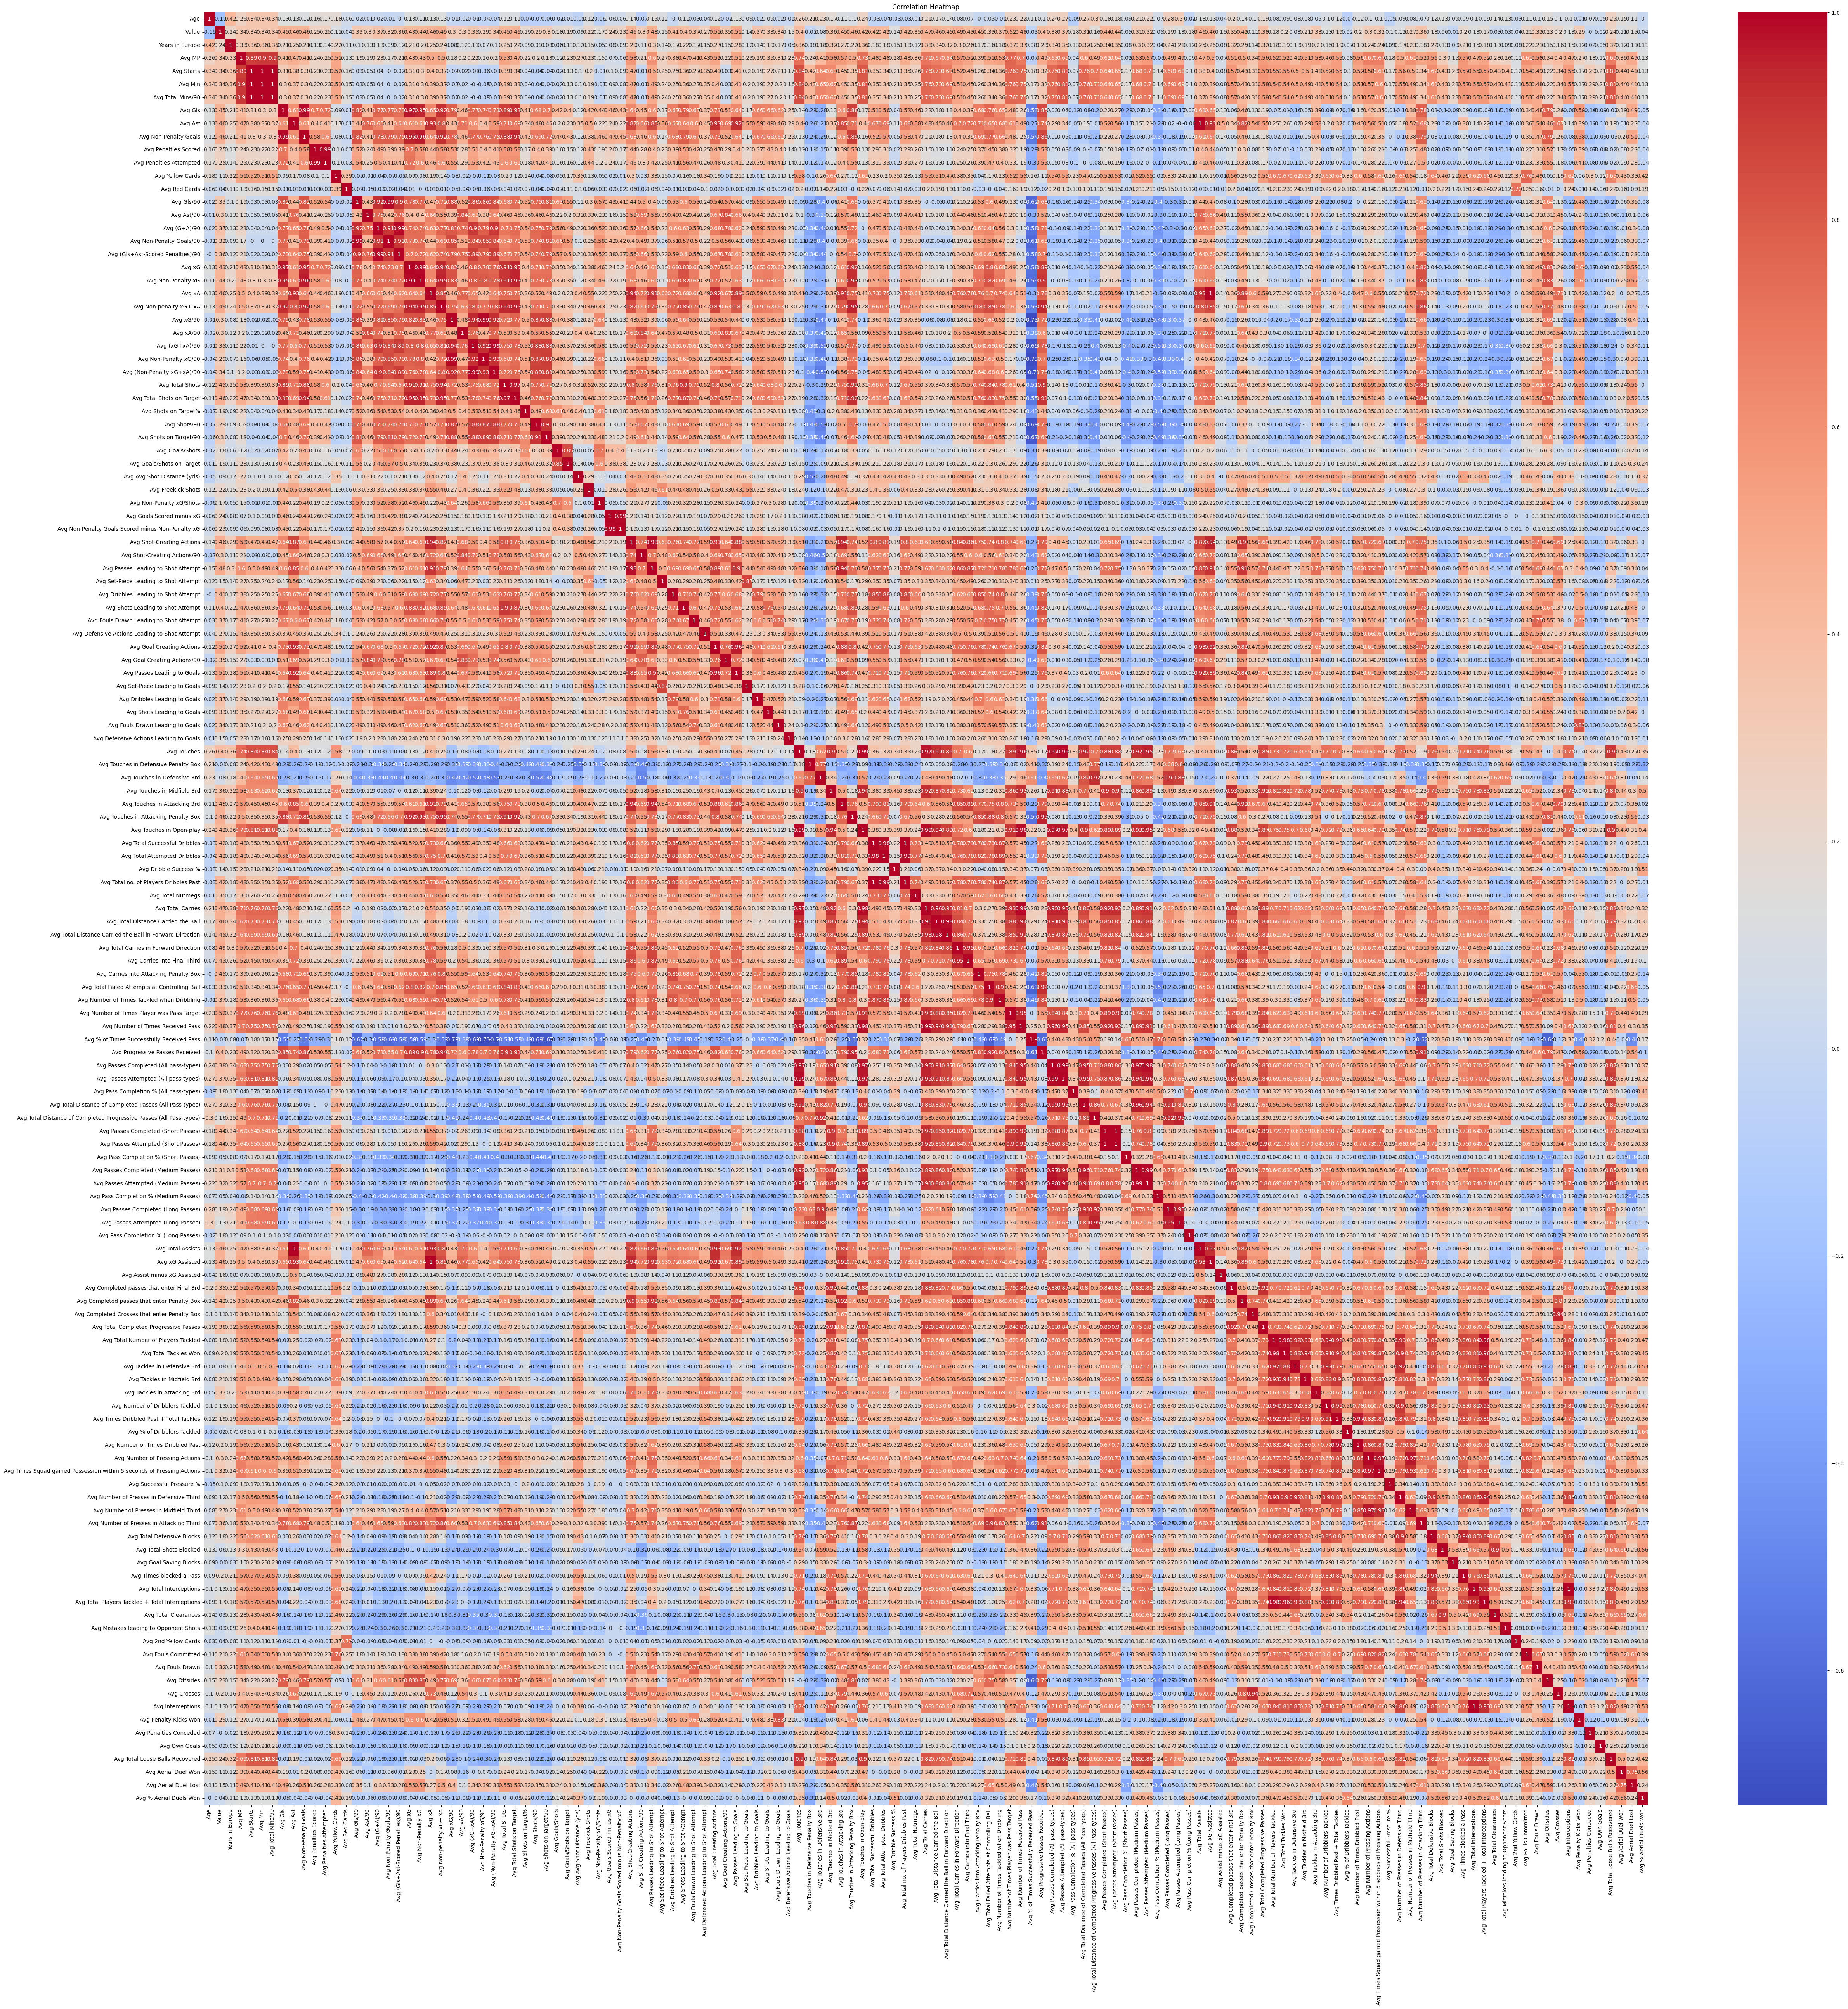

In [ ]:
# Correlation heatmap
corr = df4.corr()

plt.figure(figsize=(60,60))
sns.heatmap(corr.round(2), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df5 = df4.copy()

In [ ]:
# Split dataset to features and labels, then split to training and test sets

X = df5.drop(columns=['Value','Player','Club','League','Position','Years in Europe','Nation','Avg Interceptions','Avg Total Assists'], axis=1)
y = df5["Value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Fit Regression Tree to the training data

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Apply fitted Regression Tree to X test data to predict their y values
# Get R-square for the regression tree to see how many of the variable differences can be explained by the model

y_pred = regressor.predict(X_test)

# Evaluating the regressor
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

Mean Squared Error: 207377498982558.12
R-squared: -0.13731010147315503


In [ ]:
# Tuning the Regression Tree model with GridSearchCV and output the accuracy score

param_grid = {
    'criterion': ['squared_error'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(estimator = regressor, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

# Best parameters and best score
print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {grid.best_score_}')

Best parameters: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score: 0.2708718397941353


In [ ]:
# Employ Bagging method to validate the Regression Tree and get averageed Regression Tree score

bagging_regressor = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=100,
    random_state=42
)

# Fit the model to the training data
bagging_regressor.fit(X_train, y_train)

# Evaluate the model on the test data
bagging_score = bagging_regressor.score(X_test, y_test)

print(f"Bagging score on test data: {bagging_score}")

# Calculate R^2
print("R^2 Score:",bagging_score)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

In [ ]:
# Apply the Regression Tree after Bagging to predict players' value
# Append values and the difference between actual and predicted values onto dataset

df5['New Value (Bagging)'] = bagging_regressor.predict(X)

df5['Value Difference (Bagging)'] = df5['New Value (Bagging)'] - df5['Value']

df5

Player                      Club  Age    Position    Nation  \
0          Kylian Mbappe       Paris Saint-Germain   22      attack    France   
1         Erling Haaland         Borussia Dortmund   21      attack    Norway   
2             Harry Kane         Tottenham Hotspur   28      attack   England   
3           Jadon Sancho         Manchester United   21      attack   England   
4          Mohamed Salah              Liverpool FC   29      attack     Egypt   
...                  ...                       ...  ...         ...       ...   
2070      Matis Carvalho           Montpellier HSC   22  Goalkeeper  Portugal   
2071  Lorenzo Andrenacci                 Genoa CFC   26  Goalkeeper     Italy   
2072    Mamadou Doucoure  Borussia Mönchengladbach   23    Defender    France   
2073      Michael Langer             FC Schalke 04   36  Goalkeeper   Austria   
2074     Gianluca Pegolo               US Sassuolo   40  Goalkeeper     Italy   

          Value  Years in Europe          League     Avg MP  Avg Starts  ...  \
0     144000000                4         Ligue 1  26.750000   23.000000  ...   
1     117000000                2      Bundesliga  21.500000   19.000000  ...   
2     108000000                4  Premier League  32.250000   31.500000  ...   
3      90000000                4  Premier League  26.000000   20.500000  ...   
4      90000000                4  Premier League  36.250000   34.500000  ...   
...         ...              ...             ...        ...         ...  ...   
2070     180000                1         Ligue 1   1.000000    0.000000  ...   
2071     135000                1         Serie A   6.000000    5.000000  ...   
2072      90000                1      Bundesliga   2.000000    0.000000  ...   
2073      90000                1      Bundesliga   3.000000    2.000000  ...   
2074      90000                3         Serie A   3.333333    2.666667  ...   

      Avg Crosses  Avg Penalty Kicks Won  Avg Penalties Conceded  \
0           61.25                   2.50                     0.0   
1            8.50                   0.50                     0.0   
2           25.75                   1.25                     0.0   
3           41.75                   0.50                     0.0   
4           42.75                   2.25                     0.0   
...           ...                    ...                     ...   
2070         0.00                   0.00                     0.0   
2071         0.00                   0.00                     0.0   
2072         0.00                   0.00                     0.0   
2073         0.00                   0.00                     0.0   
2074         0.00                   0.00                     0.0   

      Avg Own Goals  Avg Total Loose Balls Recovered  Avg Aerial Duel Won  \
0          0.000000                             89.0                 3.50   
1          0.000000                             70.0                29.00   
2          0.000000                            118.5                67.75   
3          0.000000                            134.0                 2.25   
4          0.000000                            195.5                15.25   
...             ...                              ...                  ...   
2070       0.000000                              3.0                 0.00   
2071       0.000000                             34.0                 0.00   
2072       0.000000                              1.0                 0.00   
2073       0.000000                              9.0                 0.00   
2074       0.333333                             15.0                 0.00   

      Avg Aerial Duel Lost  Avg % Aerial Duels Won  New Value (Bagging)  \
0                     5.25                  36.325          120384000.0   
1                    31.50                  47.900           89001000.0   
2                   108.00                  38.650           40461300.0   
3                    16.75                

In [ ]:
# Display Values column with actual, Predict_bagging, and their differences

df5.loc[:,['Player','Value', 'New Value (Bagging)','Value Difference (Bagging)']]

Player      Value  New Value (Bagging)  \
0          Kylian Mbappe  144000000          120384000.0   
1         Erling Haaland  117000000           89001000.0   
2             Harry Kane  108000000           40461300.0   
3           Jadon Sancho   90000000           81603000.0   
4          Mohamed Salah   90000000           76455000.0   
...                  ...        ...                  ...   
2070      Matis Carvalho     180000             330300.0   
2071  Lorenzo Andrenacci     135000             396000.0   
2072    Mamadou Doucoure      90000             299700.0   
2073      Michael Langer      90000             378900.0   
2074     Gianluca Pegolo      90000             352800.0   

      Value Difference (Bagging)  
0                    -23616000.0  
1                    -27999000.0  
2                    -67538700.0  
3                     -8397000.0  
4                    -13545000.0  
...                          ...  
2070                    150300.0  
2071                    261000.0  
2072                    209700.0  
2073                    288900.0  
2074                    262800.0  

[2061 rows x 4 columns]

In [ ]:
# Sort the Differences between bagging-predicted and actual values and display top 5 most overvalued/undervalued players

sorted_dataset_bagging = df5.sort_values(by="Value Difference (Bagging)", ascending=False)

report_view_bagging = sorted_dataset_bagging[['Player', 'Value Difference (Bagging)']]
print(report_view_bagging)

                 Player  Value Difference (Bagging)
1311      Stuart Dallas                  33321600.0
382       Julian Brandt                  33102000.0
786          Iago Aspas                  28377000.0
753         Wataru Endo                  28331100.0
646      Aaron Ramsdale                  27763200.0
...                 ...                         ...
51     Thibaut Courtois                 -38768400.0
30      Alphonso Davies                 -40041000.0
32        Leon Goretzka                 -43002000.0
44    Federico Valverde                 -47542500.0
2            Harry Kane                 -67538700.0

[2061 rows x 2 columns]


In [ ]:
# Apply XGBoosting to the original Regression Tree and display its accuracy

# Initialize the XGBClassifier
xgb_regressor = XGBRegressor(random_state=42)

# Fit the model to the training data
xgb_regressor.fit(X_train, y_train)

# Evaluate the model on the test data
xgb_score = xgb_regressor.score(X_test, y_test)

print(f"XGBRegressor score on test data: {xgb_score}")

XGBRegressor score on test data: 0.42950002439316104


In [ ]:
# Apply the Regression Tree after XGBoosting to predict players' value
# Append values and the difference between actual and predicted values onto dataset

df5['New Value (XGBoosting)'] = xgb_regressor.predict(X)

df5['Value Difference (XGBoosting)'] = df5['New Value (XGBoosting)'] - df5['Value']

df5.loc[:,['Player','Value', 'New Value (XGBoosting)','Value Difference (XGBoosting)']]

In [ ]:
# Sort the Differences between bagging-predicted and actual values and display top 5 most overvalued/undervalued players

sorted_dataset_xgb = df5.sort_values(by="Value Difference (XGBoosting)", ascending=False)

# Display the top 5 most overvalued/undervalued "Player" names sorted by the largest difference
report_view_xgb = sorted_dataset_xgb[['Player', 'Value Difference (XGBoosting)']]
print(report_view_xgb)

                            Player  Value Difference (XGBoosting)
382                  Julian Brandt                     48230972.0
1311                 Stuart Dallas                     39651728.0
679   Caio Henrique Oliveira Silva                     34209120.0
1103              Francesco Caputo                     32431696.0
1499              Samir Handanovic                     28163574.0
...                            ...                            ...
23                      Marquinhos                    -36084046.0
32                   Leon Goretzka                    -39855074.0
51                Thibaut Courtois                    -43938158.0
44               Federico Valverde                    -47855131.0
2                       Harry Kane                    -65441548.0

[2061 rows x 2 columns]


In [ ]:
# Apply RandomForest to the original Regression Tree and display its R-squared value

# Initializing the Random Forest classifier
random_forest_regressor = RandomForestRegressor(n_estimators=140, random_state=42)

# Fitting the model to the training data
random_forest_regressor.fit(X_train, y_train)

# Evaluating the Random Forest model
y_pred_rf = random_forest_regressor.predict(X_test)


r2_rf_1 = r2_score(y_test, y_pred_rf)
print(f'Random Forest R^2 Score: {r2_rf_1}')

9744049.29439275
Random Forest model RMSE: 9744049.29439275


Random Forest R^2 Score: 0.47928965162038295


In [ ]:
# Random Forest has the highest R^2 score
# so apply GridSearchCV to it to display the best Tree

param_grid = {
    'criterion': ['squared_error'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(estimator = random_forest_regressor, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

# Best parameters and best score
print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {grid.best_score_}')

Best parameters: {'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score: 0.522818105613354


In [ ]:
# Get the R-squared value from the optimized Random Forest Tree

y_pred_rf_grid = grid.predict(X_test)

r2_rf_grid_1 = r2_score(y_test, y_pred_rf_grid)

print(f'Random Forest R^2 Score: {r2_rf_grid_1}')

Random Forest R^2 Score: 0.4908622558098411


In [ ]:
# Apply the optimized Regression Tree after RandomForest to predict players' value

df5['New Value (RandomForest)'] = random_forest_regressor.predict(X)

In [ ]:
# Append values and the difference between actual and predicted (RF-optimized) values onto dataset

df5['Value Difference (RandomForest)'] = df5['New Value (RandomForest)'] - df5['Value']

sorted_dataset_rf = df5.sort_values(by="Value Difference (RandomForest)", ascending=False)

# Display the top 5 most overvalued/undervalued "Player" names sorted by the largest difference
report_view_rf = sorted_dataset_rf[['Player', 'Value', 'New Value (RandomForest)', 'Value Difference (RandomForest)']]
print(report_view_rf)

                 Player  Value Difference (RandomForest)
382       Julian Brandt                     3.369536e+07
1311      Stuart Dallas                     3.130071e+07
786          Iago Aspas                     2.886300e+07
702        Rui Patricio                     2.748279e+07
646      Aaron Ramsdale                     2.699100e+07
...                 ...                              ...
51     Thibaut Courtois                    -3.889157e+07
30      Alphonso Davies                    -4.091464e+07
32        Leon Goretzka                    -4.210714e+07
44    Federico Valverde                    -4.772893e+07
2            Harry Kane                    -6.520821e+07

[2061 rows x 2 columns]


In [ ]:
report_view_rf.iloc[:16,:]

In [ ]:
report_view_rf.iloc[-16:,:]

In [ ]:
# Plot the decision tree
plt.figure(figsize=(30, 30))
plot_tree(random_forest_regressor.estimators_[0], feature_names=X.columns, filled=True, rounded=True)
plt.savefig('rf_tree_high_dpi', dpi=500)
plt.show()

In [ ]:
# Display dataframe with all Player Names, their values,
# predicted values from each decision tree, and the difference between the predictions and actual values

df5.iloc[:,[0,5, -6, -5,-4,-3,-2,-1]]

Player      Value  New Value (Bagging)  \
0          Kylian Mbappe  144000000          120384000.0   
1         Erling Haaland  117000000           89001000.0   
2             Harry Kane  108000000           40461300.0   
3           Jadon Sancho   90000000           81603000.0   
4          Mohamed Salah   90000000           76455000.0   
...                  ...        ...                  ...   
2070      Matis Carvalho     180000             330300.0   
2071  Lorenzo Andrenacci     135000             396000.0   
2072    Mamadou Doucoure      90000             299700.0   
2073      Michael Langer      90000             378900.0   
2074     Gianluca Pegolo      90000             352800.0   

      Value Difference (Bagging)  New Value (XGBoosting)  \
0                    -23616000.0            1.439849e+08   
1                    -27999000.0            1.169847e+08   
2                    -67538700.0            4.255845e+07   
3                     -8397000.0            8.997173e+07   
4                    -13545000.0            8.985070e+07   
...                          ...                     ...   
2070                    150300.0            3.194579e+05   
2071                    261000.0            4.153448e+05   
2072                    209700.0            2.178172e+05   
2073                    288900.0            7.560433e+04   
2074                    262800.0            6.764964e+04   

      Value Difference (XGBoosting)  New Value (RandomForest)  \
0                     -1.513600e+04              1.174404e+08   
1                     -1.528000e+04              8.676643e+07   
2                     -6.544155e+07              4.279179e+07   
3                     -2.827200e+04              7.875000e+07   
4                     -1.493040e+05              7.803321e+07   
...                             ...                       ...   
2070                   1.394579e+05              4.535357e+05   
2071                   2.803448e+05              4.522500e+05   
2072                   1.278172e+05              4.782857e+05   
2073                  -1.439567e+04              3.760714e+05   
2074                  -2.235036e+04              3.574286e+05   

      Value Difference (RandomForest)  
0                       -2.655964e+07  
1                       -3.023357e+07  
2                       -6.520821e+07  
3                       -1.125000e+07  
4                       -1.196679e+07  
...                               ...  
2070                     2.735357e+05  
2071                     3.172500e+05  
2072                     3.882857e+05  
2073                     2.860714e+05  
2074                     2.674286e+05  

[2061 rows x 8 columns]